In [49]:
import pandas as pd

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df = df[df['Codigo'].str.endswith('NEOE3')]

print(vale3_df)

# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
vale3_df['Ano'] = vale3_df['Data'].dt.year
vale3_df['Mes'] = vale3_df['Data'].dt.month
vale3_df['Dia'] = vale3_df['Data'].dt.day

print(vale3_df)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
1        20230102  02NEOE3          1540.0            1498.0
1670     20230103  02NEOE3          1501.0            1478.0
3412     20230104  02NEOE3          1489.0            1471.0
5060     20230105  02NEOE3          1475.0            1442.0
6599     20230106  02NEOE3          1450.0            1428.0
...           ...      ...             ...               ...
1344722  20231221  02NEOE3          2030.0            2014.0
1346567  20231222  02NEOE3          2026.0            2008.0
1348231  20231226  02NEOE3          2032.0            2008.0
1349855  20231227  02NEOE3          2033.0            2018.0
1351476  20231228  02NEOE3          2075.0            2071.0

[248 rows x 4 columns]
              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
1       2023-01-02  02NEOE3          1540.0            1498.0  2023    1    2
1670    2023-01-03  02NEOE3          1501.0            1478.0  2023    1    3
3412    20

C:\Users\savio\AppData\Local\Temp\ipykernel_4584\956196610.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y%m%d')
C:\Users\savio\AppData\Local\Temp\ipykernel_4584\956196610.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df['Ano'] = vale3_df['Data'].dt.year
C:\Users\savio\AppData\Local\Temp\ipykernel_4584\956196610.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

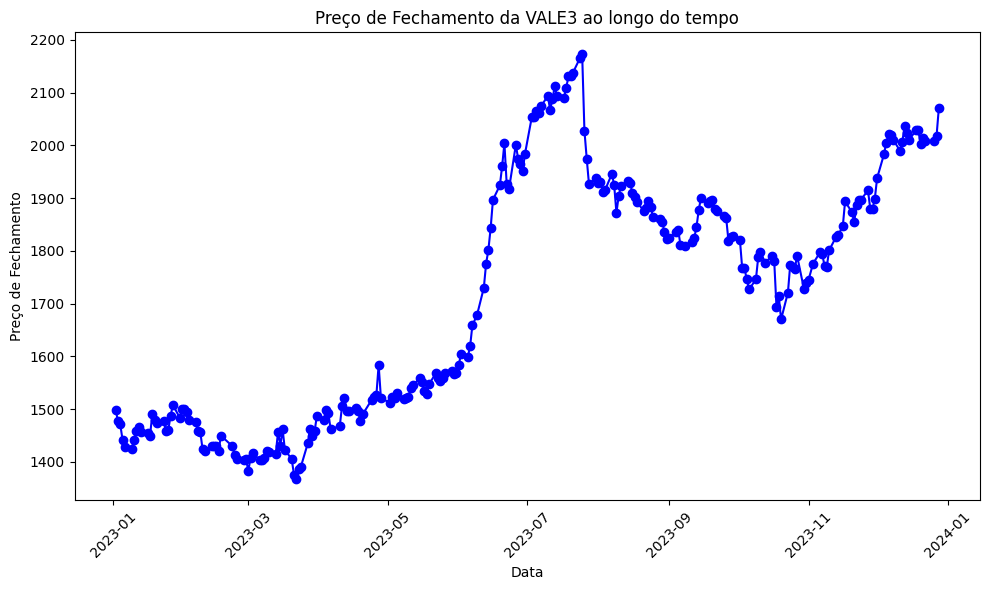

In [50]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(vale3_df['Data'], vale3_df['Preco_Fechamento'], color='blue', marker='o', linestyle='-')

# Definindo título e rótulos dos eixos
plt.title('Preço de Fechamento da VALE3 ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

C:\Users\savio\AppData\Local\Temp\ipykernel_4584\2574955753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y%m%d')
C:\Users\savio\AppData\Local\Temp\ipykernel_4584\2574955753.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df['Preco_Fechamento_Suavizado'] = vale3_df['Preco_Fechamento'].rolling(window=7).mean()


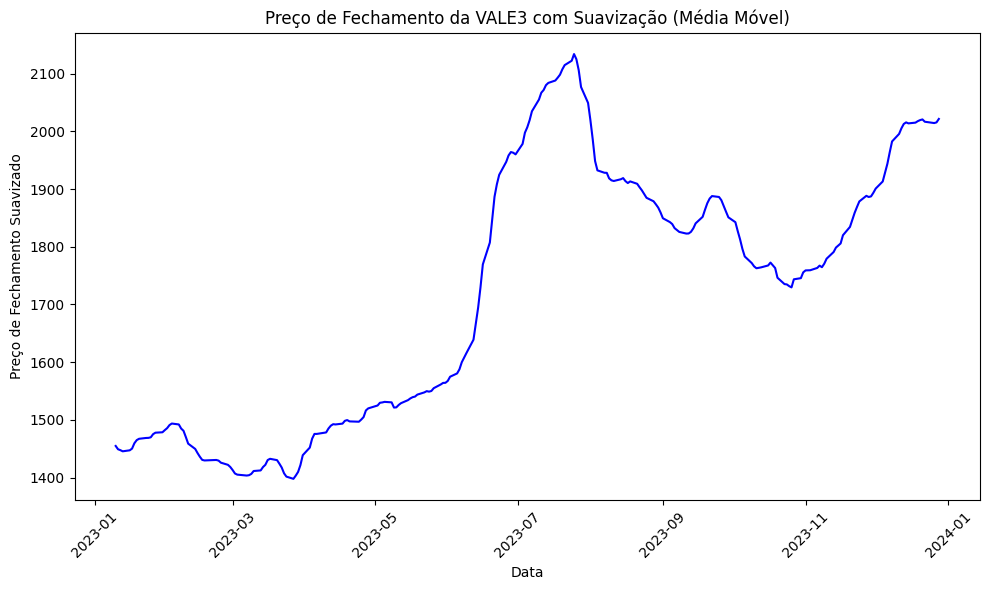

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df = df[df['Codigo'].str.endswith('NEOE3')]

# Convertendo a coluna 'Data' para datetime
vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y%m%d')

# Suavização dos dados usando média móvel com janela de 7 dias
vale3_df['Preco_Fechamento_Suavizado'] = vale3_df['Preco_Fechamento'].rolling(window=7).mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(vale3_df['Data'], vale3_df['Preco_Fechamento_Suavizado'], color='blue', linestyle='-')

# Definindo título e rótulos dos eixos
plt.title('Preço de Fechamento da VALE3 com Suavização (Média Móvel)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Suavizado')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


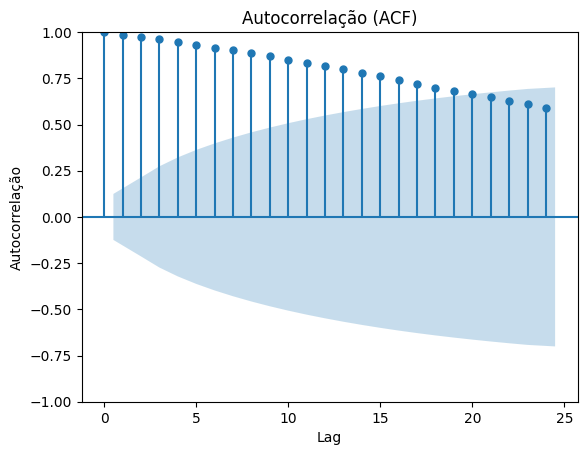

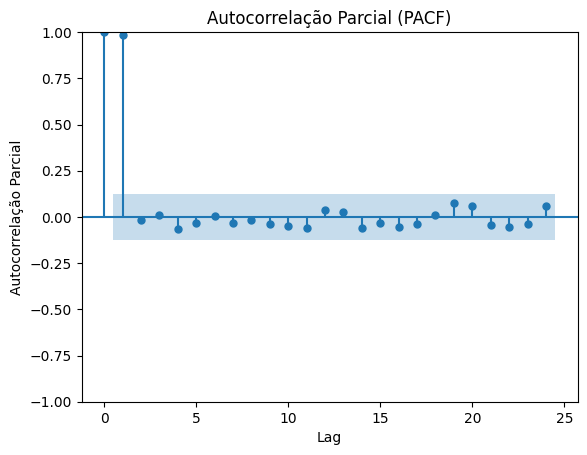

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráfico de Autocorrelação (ACF)
plot_acf(vale3_df['Preco_Fechamento'])
plt.title('Autocorrelação (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.show()

# Gráfico de Autocorrelação Parcial (PACF)
plot_pacf(vale3_df['Preco_Fechamento'])
plt.title('Autocorrelação Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação Parcial')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo de 2022 e 2023 para treinamento
df_train_2022 = pd.read_fwf('COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df_train_2023 = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df_train = pd.concat([df_train_2022, df_train_2023])

# Carrega o arquivo de 2024 para teste
df_test = pd.read_fwf('COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df_train = df_train[df_train['Codigo'].str.endswith('NEOE3')]
vale3_df_test = df_test[df_test['Codigo'].str.endswith('NEOE3')]

# Convertendo a coluna 'Data' para datetime no conjunto de treinamento
vale3_df_train['Data'] = pd.to_datetime(vale3_df_train['Data'], format='%Y%m%d')

# Suavização dos dados usando média móvel com janela de 7 dias no conjunto de treinamento
vale3_df_train['Preco_Fechamento_Suavizado'] = vale3_df_train['Preco_Fechamento'].rolling(window=7).mean()

In [55]:
# Ajusta o modelo ARIMA aos dados históricos de treinamento
model = ARIMA(vale3_df_train['Preco_Fechamento_Suavizado'], order=(2, 1, 2))  # Parâmetros p, d, q
fit_model = model.fit()

# Erro do q d p do order=( , , ) = Arima vasio(NaN)

c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Faz as previsões para 2024
forecast = fit_model.forecast(steps=len(vale3_df_test))  

# Cria um índice de datas para as previsões
forecast_index = vale3_df_test['Data']

# Cria um DataFrame com as previsões
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Preco_Fechamento_Predito'])

# Plota os dados de teste e as previsões
plt.figure(figsize=(10, 6))
plt.plot(vale3_df_test['Data'], vale3_df_test['Preco_Fechamento'], label='Dados de Teste')
plt.plot(forecast_df.index, forecast_df['Preco_Fechamento_Predito'], label='Previsões ARIMA', linestyle='--')
plt.title('Previsão de Preço de Fechamento da VALE3 em 2024 (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
print(forecast_df)


         Preco_Fechamento_Predito
Data                             
20240102                      NaN
20240103                      NaN
20240104                      NaN
20240105                      NaN
20240108                      NaN
...                           ...
20240325                      NaN
20240326                      NaN
20240327                      NaN
20240328                      NaN
20240401                      NaN

[62 rows x 1 columns]
